### Training of RMDL on Stack Overflow Data

#### Necessary libraries

In [1]:
import pandas as pd

In [2]:
! pip install RMDL

     |████████████████████████████████| 51kB 2.6MB/s 


### Importing the preprocessed Data

In [14]:
df = pd.read_csv("/content/drive/MyDrive/BERT_canadian_AI/stack_overflow_10000.csv")

In [ ]:
### one hot 

In [16]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
stack_labels = encoder.fit_transform(df.single_label.values)

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.Body.values,stack_labels,test_size = 0.2,random_state=42)

In [18]:
from RMDL import RMDL_Text as rmdl

Done1
tf-idf with 70428 features
/content/drive/MyDrive/BERT_canadian_AI/glove.6B.100d.txt
Found 80467 unique tokens.
(10000, 100)
Total 400000 word vectors.
10
DNN 0
Epoch 1/20
63/63 - 14s - loss: 2.1993 - accuracy: 0.2218 - val_loss: 1.6878 - val_accuracy: 0.5380

Epoch 00001: val_accuracy improved from -inf to 0.53800, saving model to weights\weights_DNN_0.hdf5
Epoch 2/20
63/63 - 13s - loss: 1.2274 - accuracy: 0.5853 - val_loss: 0.7970 - val_accuracy: 0.7460

Epoch 00002: val_accuracy improved from 0.53800 to 0.74600, saving model to weights\weights_DNN_0.hdf5
Epoch 3/20
63/63 - 13s - loss: 0.5022 - accuracy: 0.8484 - val_loss: 0.7122 - val_accuracy: 0.7740

Epoch 00003: val_accuracy improved from 0.74600 to 0.77400, saving model to weights\weights_DNN_0.hdf5
Epoch 4/20
63/63 - 13s - loss: 0.2286 - accuracy: 0.9376 - val_loss: 0.7769 - val_accuracy: 0.7785

Epoch 00004: val_accuracy improved from 0.77400 to 0.77850, saving model to weights\weights_DNN_0.hdf5
Epoch 5/20
63/63 - 13s -

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


RNN 0
3
115
Epoch 1/20
63/63 - 115s - loss: 2.2848 - accuracy: 0.1285 - val_loss: 2.2310 - val_accuracy: 0.1660

Epoch 00001: val_accuracy improved from -inf to 0.16600, saving model to weights\weights_RNN_0.hdf5
Epoch 2/20
63/63 - 104s - loss: 2.1287 - accuracy: 0.2126 - val_loss: 1.9525 - val_accuracy: 0.2785

Epoch 00002: val_accuracy improved from 0.16600 to 0.27850, saving model to weights\weights_RNN_0.hdf5
Epoch 3/20
63/63 - 105s - loss: 1.7401 - accuracy: 0.3336 - val_loss: 1.6864 - val_accuracy: 0.3695

Epoch 00003: val_accuracy improved from 0.27850 to 0.36950, saving model to weights\weights_RNN_0.hdf5
Epoch 4/20
63/63 - 106s - loss: 1.4267 - accuracy: 0.4335 - val_loss: 1.5535 - val_accuracy: 0.4420

Epoch 00004: val_accuracy improved from 0.36950 to 0.44200, saving model to weights\weights_RNN_0.hdf5
Epoch 5/20
63/63 - 105s - loss: 1.1395 - accuracy: 0.5596 - val_loss: 1.4627 - val_accuracy: 0.5165

Epoch 00005: val_accuracy improved from 0.44200 to 0.51650, saving model t

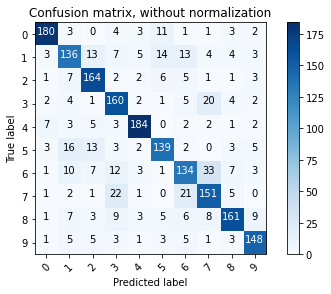

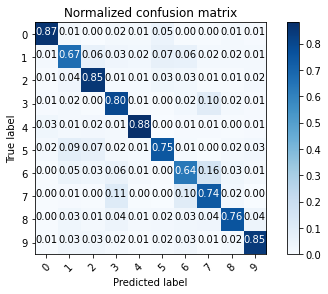

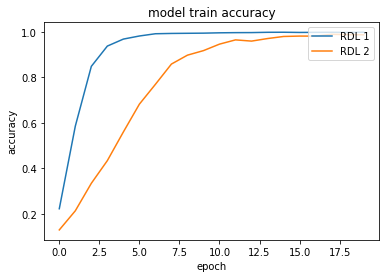

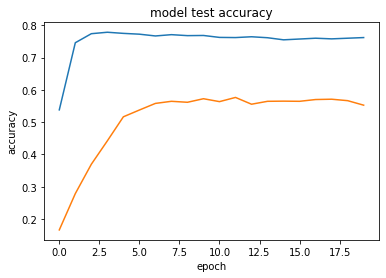

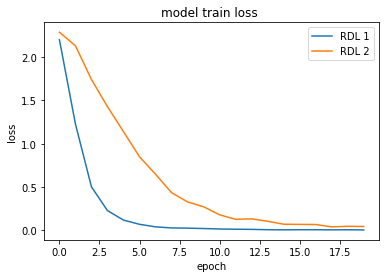

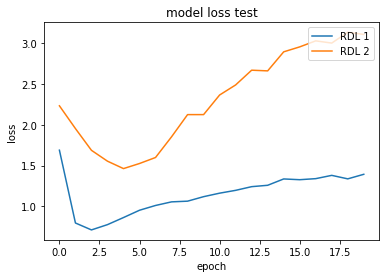

(2000, 2)
Accuracy of 2 models: [0.7785, 0.5765]
Accuracy: 0.7785
F1_Micro: (0.7785, 0.7785, 0.7785, None)
F1_Macro: (0.7803464761717724, 0.7796948528815277, 0.7790580686869275, None)
F1_weighted: (0.7802709747454334, 0.7785, 0.7784090689285138, None)


In [20]:
model_i = rmdl.Text_Classification(X_train, y_train, X_test,  y_test, batch_size=128,
                        EMBEDDING_DIM=100,MAX_SEQUENCE_LENGTH = 100, MAX_NB_WORDS = 80468,
                        GloVe_dir="/content/drive/MyDrive/BERT_canadian_AI/",
                 GloVe_file = "glove.6B.100d.txt",
                        sparse_categorical=True, random_deep=[1, 1, 0], epochs=[20, 20, 0],  plot=True,
                        min_hidden_layer_dnn=1, max_hidden_layer_dnn=8, min_nodes_dnn=128, max_nodes_dnn=256,
                        min_hidden_layer_rnn=1, max_hidden_layer_rnn=5, min_nodes_rnn=32,  max_nodes_rnn=128,
                        min_hidden_layer_cnn=3, max_hidden_layer_cnn=10, min_nodes_cnn=128, max_nodes_cnn=512,
                        random_state=42, random_optimizor=False, dropout=0.5,no_of_classes=10)
